In [29]:
import os, sys
project_directory = os.getcwd()
sys.path.append(project_directory)

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import random

import matplotlib.pyplot as plt

resume = pd.read_csv('all_results.csv')
resume

,SAC,SSC
0,1.423638,1.912477
1,1.604965,1.082951
2,1.278690,1.977120
3,1.762468,1.744765
4,1.113000,1.828843
5,1.284448,1.008613
6,1.991155,1.119245
7,1.053702,1.895460
8,1.053375,1.840580
9,1.420532,1.685147


In [30]:
for i in range(10):
    print("{}, {}".format(random.random() + 1, random.random() + 1, ))

1.9017119693514626, 1.1019296979306983
1.5696342736855502, 1.4692307069859127
1.202310336205107, 1.0305742665719753
1.2217589823173554, 1.5818796927812682
1.7749258459305473, 1.7323448685081195
1.6287070884466002, 1.7121077235709459
1.2257021236746684, 1.5909355518882777
1.6421853803843809, 1.3819846906430104
1.0559559283008104, 1.8025569574391191
1.1637852947399412, 1.9330246585824895


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

         SAC       SSC    h
0   1.000000  1.000000  0.0
1   1.053375  1.008613  0.0
2   1.053375  1.008613  0.1
3   1.053702  1.082951  0.1
4   1.053702  1.082951  0.2
5   1.113000  1.119245  0.2
6   1.113000  1.119245  0.3
7   1.278690  1.685147  0.3
8   1.278690  1.685147  0.4
9   1.284448  1.744765  0.4
10  1.284448  1.744765  0.5
11  1.420532  1.828843  0.5
12  1.420532  1.828843  0.6
13  1.423638  1.840580  0.6
14  1.423638  1.840580  0.7
15  1.604965  1.895460  0.7
16  1.604965  1.895460  0.8
17  1.762468  1.912477  0.8
18  1.762468  1.912477  0.9
19  1.991155  1.977120  0.9
20  1.991155  1.977120  1.0
21  1.991155  1.991155  1.0


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

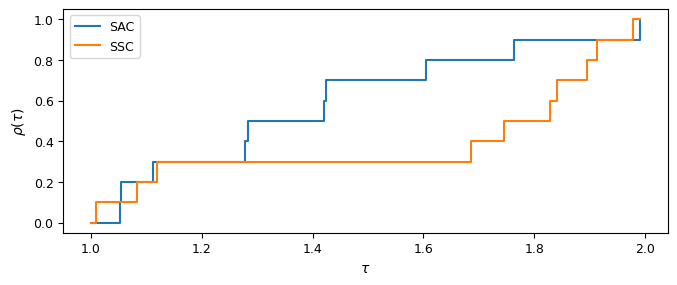

In [31]:
vet = []
names = resume.columns

for key in names:

    h = 1. / len(resume)
    linha = [[1, 0]]
    resume_ = np.array(resume[key])
    resume_ = np.sort(resume_)

    for i in resume_:
        linha.append([i, linha[-1][1]])
        linha.append([i, linha[-1][1] + h])

    linha = np.array(linha).T
    vet.append(linha[0,:])
vet = np.array(vet).T
maior = np.max(vet)
maior = [[maior for _ in range(len(names))]]
vet = np.concatenate([vet, np.array(maior)])
vet = pd.DataFrame(vet)

vet.columns = names
vet['h'] = [h*(i//2) for i in range(len(vet))]
plt.figure(figsize=(6.8, 3))
plt.rcParams.update({'font.family': 'serif',
                        'font.serif': 'Times New Roman',
                        'mathtext.fontset': 'custom',
                        'axes.labelsize': 10,
                        'legend.fontsize': 9,
                        'xtick.labelsize': 9, 
                        'ytick.labelsize': 9})
for i in range(len(names)):
    plt.plot(vet[names[i]], vet['h'], label = names[i])#, linestyle=line[i], color=cores[i])

print(vet)

plt.legend()
plt.xlabel(fr'$\tau$')
plt.ylabel(fr'$\rho(\tau)$')
plt.tight_layout(pad=0.8, rect=[0, 0, 1, 0.96])
plt.savefig('figure3.pdf')